## Utilizing Tree Crown Detection from DeepForest to calculate carbon displacement 

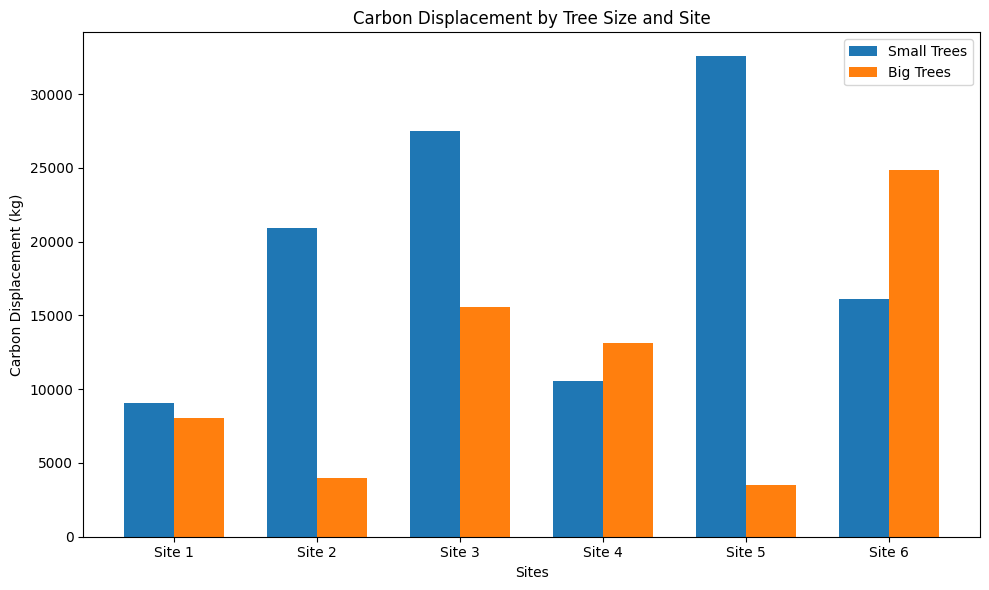

In [36]:
# List of unique site names based on 'img_name'
sites = data['img_name'].unique()

# Prepare lists to store results
small_tree_count = []
big_tree_count = []
total_carbon_small = []
total_carbon_big = []

# Process data to count small and big trees per site
for site in sites:
    site_data = data[data['img_name'] == site]

    # Count trees based on bounding boxes
    small_trees = site_data[(site_data['xmax'] - site_data['xmin'] <300) & (site_data['ymax'] - site_data['ymin'] < 300)]
    big_trees = site_data[(site_data['xmax'] - site_data['xmin'] >= 300) & (site_data['ymax'] - site_data['ymin'] >= 300)]

    # Store counts
    small_tree_count.append(len(small_trees))
    big_tree_count.append(len(big_trees))

    # You can calculate the carbon displacement here if needed
    total_carbon_small.append(len(small_trees) * 22.6)  # For example, for small trees
    total_carbon_big.append(len(big_trees) * 22.6 * 1.5)  # Assuming bigger trees capture more carbon

# Create a bar graph
labels = [f"Site {i+1}" for i in range(len(sites))]
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, total_carbon_small, width, label='Small Trees')
ax.bar(x + width/2, total_carbon_big, width, label='Big Trees')

# Add labels, title, and legend
ax.set_xlabel('Sites')
ax.set_ylabel('Carbon Displacement (kg)')
ax.set_title('Carbon Displacement by Tree Size and Site')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()